
# Home Assignment 1
## Data Science IV, Summer Semester 2021
### Instructor: Johannes Wachs
----
### Instructions 
Answer the following questions with a mixture of code (Python 3) and markdown cells, as appropriate. Your submission should be a Jupyter notebook (.ipynb). Your notebook should run from beginning to end - please test this before you submit. You may use libraries or code written in class, unless specifically noted otherwise.

Submit your solutions via Learn by ***23.59pm on Wednesday, March 31st 2021***. Late submissions are accepted for 12 hours following the deadline, with 1/3 of the total possible points deducted from the score.

It is ok to borrow code from online sources, if you cite all your sources. Plagiarism will result in an automatic score of 0 points. You may discuss the assignment with your classmates, but everyone should write their own code.

### Please fill in:
Student name: me

WU Student ID: me 

----
### Task 1: Write your own bootstrap. (20 Points)
Write a function that:
- takes a list of numbers as input
- calculates their mean
- bootstraps (1000 times) the mean
- returns a list with three elements: the mean, and the lower and upper bounds of the 95\% confidence interval of the bootstrapped mean.

In [1]:
import numpy as np
np.random.seed(16)

def bootstrap_mean_CI(input_list):
    # bootstraping
    bootstraped_mean = [np.mean(np.random.choice(a=input_list,
                                                 replace=True,
                                                 size=len(input_list))) for _ in range(1000)]
    # confidence interval
    ci_low = np.percentile(bootstraped_mean, 2.5)
    ci_up = np.percentile(bootstraped_mean, 97.5)
    
    return [np.mean(input_list), ci_low, ci_up]

# tests
# l = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# print(bootstrap_mean_CI(l))

Write a more general function that takes two inputs:
- a list of numbers
- a function implementing a statistical measure (i.e. the mean, median, variance)
And outputs the statistic and a bootstrapped estimate of the 95% confidence interval.

In [2]:
np.random.seed(16)

def bootstrap_general_CI(input_list, statistical_function):
    # bootstraping
    bootstraped = [statistical_function(np.random.choice(a=input_list,
                                                 replace=True, 
                                                 size=len(input_list))) for _ in range(1000)]
    # confidence interval
    ci_low = np.percentile(bootstraped, 2.5)
    ci_up = np.percentile(bootstraped, 97.5)

    return [statistical_function(input_list), ci_low, ci_up]


# tests
# print(bootstrap_general_CI(l, np.mean))
# print(bootstrap_general_CI(l, np.median))
# print(bootstrap_general_CI(l, np.var))

Draw 1000 samples from a Poisson distribution with mean 10. Apply your general function to calculate the mean and estimate the 95% confidence interval.

In [3]:
samples = np.random.poisson(lam=10.0, size=1000)
bootstrap_general_CI(samples, np.mean)

[9.889, 9.69, 10.081]

-----
### Task 2: Finding correlations in random data. (20 Points)
- Generate 100 vectors of 100 numbers each, drawn from a normal distribution with mean 0 and standard deviation 1.
- Calculate the Pearson correlations between all pairs of vectors.
- Plot a histogram of the correlations - be sure to label your axes.
- Select the pair of vectors with the greatest (in absolute value) correlation. Calculate the statistical significance of this correlation, either using a built in library function, or by writing your own.
- Interpret your findings: is the correlation statistically significant? Hint: think of jellybeans.

Max. absolute correlation between two pairs of vectors is: 0.37598473642109953
P-value of max absolute correlation is: 0.00011571789441034446 and is statistically significant, since p<0.05


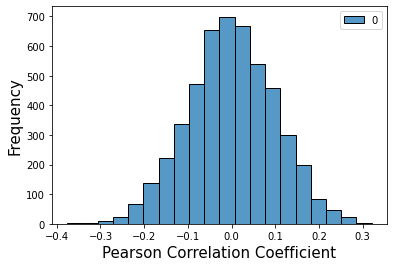

In [4]:
from scipy.stats import pearsonr
from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

# 100 random vectors drawn from a normal dist with mean of 0 and std of 1
np.random.seed(16)
vectors = [np.random.normal(loc=0, scale=1, size=100) for _ in range(100)]

# all possible pairs of vectors
vector_pairs = list(combinations(vectors, 2))

# dictionary containing pearson correlation and p-value between all vector pairs
pearson = dict([pearsonr(pair[0], pair[1]) for pair in vector_pairs])

# plot data
pearson_coef = pearson.keys()

sns.histplot(pearson_coef,
         bins=20,
         color='blue')

plt.ylabel('Frequency', size=15)
plt.xlabel('Pearson Correlation Coefficient', size=15)

# since scipy.stats.pearsonr returns p-value I will just use that
max_abs = max(pearson_coef, key=abs)
p_value_of_max = pearson[max_abs]

print('Max. absolute correlation between two pairs of vectors is:', abs(max_abs))
print('P-value of max absolute correlation is:', p_value_of_max, 'and is statistically significant, since p<0.05')

-----
### Task 3: Regex practice (20 Points)
- Using the library re, write a function including a regex that finds the positions of all leading 0s. Example: "I have 023 apples and 0301 oranges and 008 strawberries" has four leading zeros.
- Define a function that finds all dates in a string of the format dd-mm-yyyy OR mm-dd-yyyy. To keep it simple invalid dates (for example 50-50-2004) are ok.

In [5]:
import re

def leading_zeros(input_string):
    regex = re.compile(r'\b(0+)')
    matches = regex.finditer(input_string)
    # I am not quite sure if we should return start, span or end of position so I will stick with start
    return [m.start() for m in matches]

# tests
# test_str = 'I have 023 apples and 0301 oranges and 008123 strawberries'
# print(leading_zeros(test_str))

In [6]:
def find_all_dates(input_string):
    regex = re.compile(r'\b\d{2}-\d{2}-\d{4}\b')
    result = regex.findall(input_string)
    return result

# tests
# test_str = """Okay this is some random text written on 20-03-2021 22-03-2229
#             and it should work when I execute it at 31.03.2021 (this one is invalid due to dots)
#             and this one as well 23.2020.15 and this one is valid 20.20.2021 but this one is not 002-23-2921
#             this one not as well 20-2220-211123 and I will submit this on 31-03-2021 at midnight and this one is invalid
#             203-203-2021, 2020-21-12"""
# print(find_all_dates(test_str))

-----
### Task 4: Python or Java? (40 Points)
Stack Overflow is a platform for people to ask and answer questions about computer programming. The site uses a system of tags to label posts. These tags help users search for questions. Often users do not tag their posts but NLP can help. 

In this task, your goal will be to train a machine learning classifier to distinguish between questions tagged *python* and *java* using the text of the question. The resulting classifier represents a first step towards a system that can automatically categorize new incoming posts.

I have provided you with a random sample of 1000 posts tagged python and 1000 posts tagged java. Note that none of the posts in your sample have been tagged with both python and java. To make the task more challenging, I have removed the substrings python, java, and py from the questions.

This task will require several steps. Feel free to adapt code from the in-class demonstration.

Steps:
- Read in the file python_or_java.csv
- Process the text as discussed during the class.
- Create a document-term matrix, weighted via TD-IDF.
- Carry out a test-train split or cross-validation procedure
- Train a classifier to distinguish Python from Java posts on training data.
- Evaluate the performance of your classifier on held out data. You should report at least two evaluation statistics. What is the baseline accuracy of a classifier that always guesses Python?
- What text features are most suggestive of a Python post? A Java post?

In [7]:
import pandas as pd
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
ps = PorterStemmer() 
en_stopwords= stopwords.words('english')

# I took this part of code from your notebook, since it is written that we should process data as discussed in class,
# and I also understand clearly what is happening here
def get_wordnet_pos(token):
    tag = nltk.pos_tag([token])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, #map
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def processing_pipeline(text):
    tokens=nltk.word_tokenize(text)
    lemmatized_tokens=[lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    stemmed_tokens =[ps.stem(token) for token in lemmatized_tokens]
    processed_tokens = [token for token in stemmed_tokens if token not in en_stopwords]
    processed_tokens = [token for token in processed_tokens if token not in string.punctuation]
    return processed_tokens

In [8]:
# for better visibility of post-text and token columns
pd.set_option('display.max_colwidth', None)

# load csv and process post text column
# since its written that we only need to hand in jupyternotebook I suppose you will have csv file named as it was given to us
df = pd.read_csv('python_or_java.csv')
df['processed_text'] = df['Body'].apply(lambda text: processing_pipeline(text))

#df

In [9]:
# I will perform classification task with the help of random forests algorithm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

corpus = list([' '.join(text) for text in df['processed_text']])

#keeps only the tokens that are present in at least 10 posts, and in at most 50% of posts
vectorizer = TfidfVectorizer(min_df=10, max_df=.5) 

X = vectorizer.fit_transform(corpus)
Y = np.array(df['python_post'])

# random split of data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)

# Random Forest Classification task
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, Y_train)
Y_pred = model.predict_proba(X_test)[:,1]

# baseline - always Python
always_python_pred = np.empty(len(Y_test))
always_python_pred.fill(1)
print('Baseline Accuracy:', round(accuracy_score(Y_test, always_python_pred), 3))
print(40*'=')

# Radnom forest model accuracy
print('Random Forest Model Accuracy:',round(accuracy_score(Y_test, model.predict(X_test)),3))
print(40*'=')

# Confusion Matrix:
print('Confusion Matrix:', confusion_matrix(Y_test, model.predict(X_test)))
print(40*'=')

# 10-fold cross validation score
accuracies = cross_val_score(estimator=model, 
                             X=X_train,
                             y=Y_train,
                             cv=10)
print('Accuracy (10-fold):', np.mean(accuracies))
print(40*'=')

# Area Under the Curve score
print('AUC Score:', round(roc_auc_score(Y_test,Y_pred),3))
print(40*'=')


f_importances = pd.Series(model.feature_importances_).sort_values(ascending=False)[:10]

# Feature importances
for i in f_importances.index:
    print(vectorizer.get_feature_names()[i])

Baseline Accuracy: 0.498
Random Forest Model Accuracy: 0.908
Confusion Matrix: [[181  20]
 [ 17 182]]
Accuracy (10-fold): 0.92125
AUC Score: 0.972
public
def
python
java
print
void
new
import
string
self


I tried a lot to come up with a solution on how to get feature importance for both classes separatly but so far I had no success. I would really appreciate your feedback on this matter. Thank you in advance.